In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import cm
import math
from matplotlib import cm
cmap = cm.get_cmap('tab10')
import pandas as pd
%config InlineBackend. figure_format = 'retina'

In [3]:
#############data preparation#############
file_path = '../AllWindowData.json'
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

[{'type': 0, 'userId': 1, 'caseNum': 1, 'windowMode': 0, 'transparency': 0.7565704584121704, 'position': [-0.4385607838630676, -0.5804381966590881, 1.2819652557373047], 'rotation': [17.696849822998047, 346.54168701171875, -2.2404564958833362e-07], 'normal': [-0.22172413766384125, -0.3039807081222534, 0.9265171885490417], 'corner': [{'position': [-0.9489350914955139, -0.31082725524902344, 1.2482845783233643]}, {'position': [0.03176984190940857, -0.31082725524902344, 1.4829763174057007]}, {'position': [0.07181352376937866, -0.8500491380691528, 1.3156459331512451]}, {'position': [-0.9088914394378662, -0.8500491380691528, 1.0809541940689087]}], 'scale': 2.630140781402588}, {'type': 1, 'userId': 1, 'caseNum': 1, 'windowMode': 0, 'transparency': 0.8962197303771973, 'position': [0.23975759744644165, -0.7177572846412659, 1.411801815032959], 'rotation': [20.33527374267578, 349.6454772949219, 0.0], 'normal': [-0.16853635013103485, -0.34751299023628235, 0.9224045872688293], 'corner': [{'position'

c:\Users\chiao6673\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chiao6673\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chiao6673\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\chiao6673\AppData\Local\Programs\Python\Python39\lib\site-packages\

2
1
Silhouette 2 2
group 1 n = 88
(array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  80,  81,  82,
        83,  84,  85,  86,  87,  97,  98,  99, 103, 104, 105, 106, 107,
       109, 111, 112, 113, 114, 115, 116, 117, 118, 119], dtype=int64),)
group 2 n = 40
(array([  8,  12,  40,  41,  42,  43,  44,  45,  46,  47,  72,  73,  74,
        75,  76,  77,  78,  79,  88,  89,  90,  91,  92,  93,  94,  95,
        96, 100, 101, 102, 108, 110, 120, 121, 122, 123, 124, 125, 126,
       127], dtype=int64),)


c:\Users\chiao6673\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


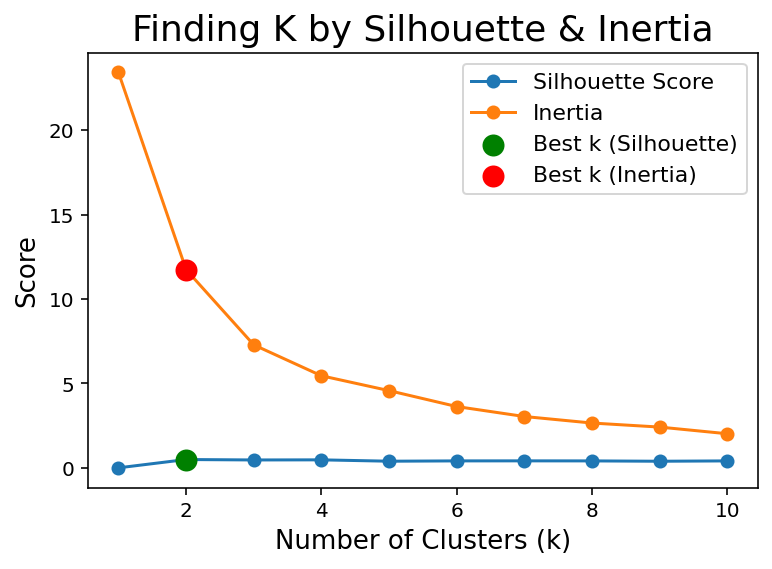

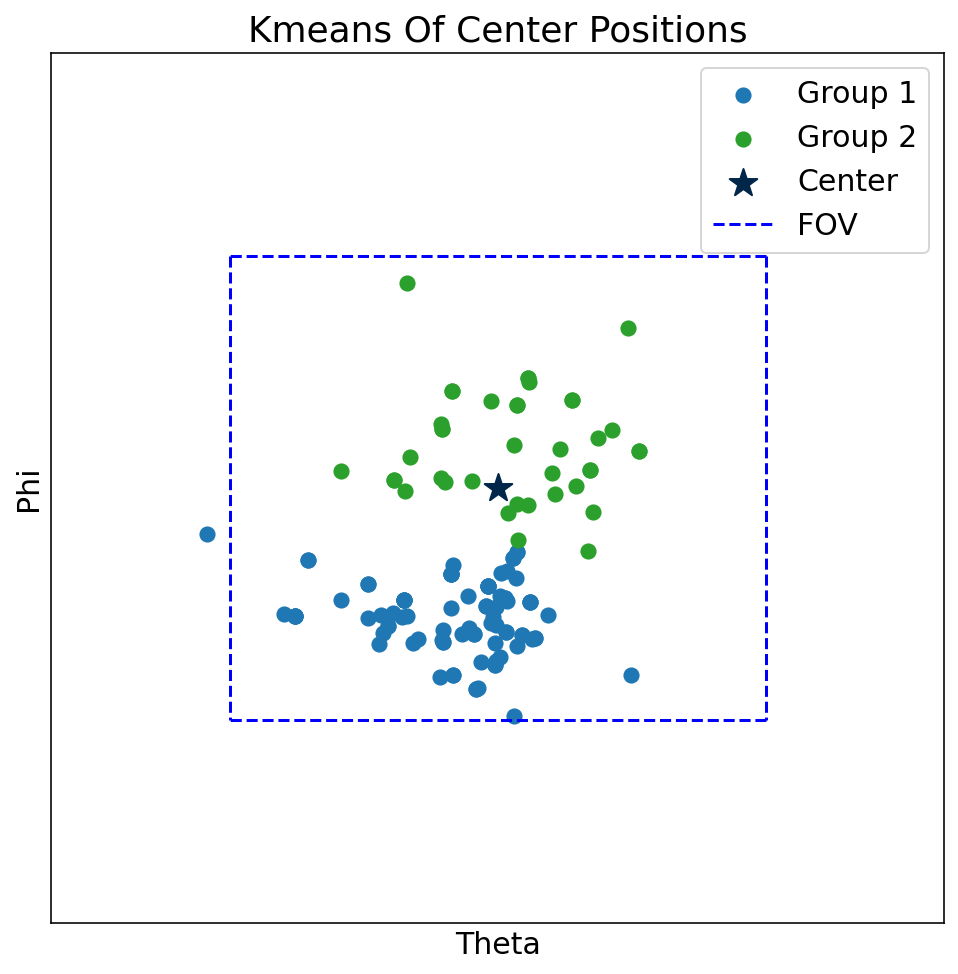

In [18]:
modes = ["all"]  # all head or path
factors_=["angle"] # angle or xyz
bests = ["Silhouette"] #可以改 Silhouette or inertia
#############data preparation#############
file_path = '../AllWindowData.json'
# file_path = '../AllWindowData_normalized.json'
with open(file_path, 'r') as json_file:
    data = json.load(json_file)

def sort_key(window_data):
    return (window_data['userId'], window_data['caseNum'], window_data['windowMode'], window_data['type'])

data['windowDatas'] = sorted(data['windowDatas'], key=sort_key)
print(data['windowDatas'])



#########################
def cartesian_to_spherical(x, y, z):
    rho = math.sqrt(x**2 + y**2 + z**2)
    theta = math.atan2(y, x) # 經度
    phi = math.acos(z / rho) # 緯度
    return theta, phi
def find_best_k(k_values, inertias):
    deltas = np.diff(inertias)
    deltas_diff = np.diff(deltas)
    best_k_index = deltas_diff.argmax() + 1  
    return k_values[best_k_index]


head_positions=[]
path_positions=[]
all_positions=[]
for window_data in data["windowDatas"]:
    position = window_data["position"]
    window_type = window_data["type"]
    caseNum=window_data["caseNum"]
    window_mode =window_data["windowMode"] # 0 for path, 1 for head
    if window_type == 0: # for presentation
        if window_mode == 0:
            path_positions.append(position)
        else:
            head_positions.append(position)
        all_positions.append(position)
        
for mode in modes:
    for factors in factors_:
        for best in bests:           
            if mode =="head":
                list1 = np.array(head_positions)[:, 0]
                list2 = np.array(head_positions)[:, 1]
                list3 = np.array(head_positions)[:, 2]
            elif mode =="path":
                list1 = np.array(path_positions)[:, 0]
                list2 = np.array(path_positions)[:, 1]
                list3 = np.array(path_positions)[:, 2]
            elif mode == "all":
                list1 = np.array(all_positions)[:, 0]
                list2 = np.array(all_positions)[:, 1]
                list3 = np.array(all_positions)[:, 2]
            theta_list = []
            phi_list = []
            if factors=="xyz":
                data=np.column_stack((list1,list3, list2)) #x z y
            elif factors =="angle":
                for x, y, z in zip(list1, list3, list2):#x z y
                    theta, phi = cartesian_to_spherical(x, y, z) 
                    theta_list.append(theta)
                    phi_list.append(phi)
                data=pd.DataFrame({'theta': theta_list, 'phi': phi_list})
    
            ###############Kmeans-find best k###########
            silhouette_scores = []
            inertias = []  
            k_values = range(1, 11)
            for k in k_values:
                kmeans = KMeans(n_clusters=k)
                kmeans.fit(data)
                # Calculate the silhouette score for this value of k
                if k != 1:
                    silhouette_avg = silhouette_score(data, kmeans.labels_)
                    silhouette_scores.append(silhouette_avg)
                else:
                    silhouette_scores.append(0)
                # Get the inertia for this value of k
                inertia = kmeans.inertia_
                # print(k, kmeans.inertia_)
                inertias.append(inertia)
            plt.figure()
            plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
            plt.plot(k_values, inertias, marker='o', label='Inertia')
            best_k_silhouette = k_values[np.argmax(silhouette_scores)]
            best_k_inertia = find_best_k(k_values, inertias)
            #####################
            print(best_k_inertia)
            # 計算每個k值的變化率
            variance_rates = [((inertias[i - 1] - inertias[i]) / inertias[i - 1]) * 100
                            if i > 0 else 0 for i in range(len(inertias))]

            # 尋找變化率降低到一個明顯水平的點，視為肘部點
            elbow_point = np.argmax(variance_rates)
            print(elbow_point)
            ########################
            plt.scatter(best_k_silhouette, max(silhouette_scores), color='green', label='Best k (Silhouette)', s=100, zorder=5)
            plt.scatter(best_k_inertia, inertias[best_k_inertia-1], color='red', label='Best k (Inertia)', s=100, zorder=5)

            plt.xlabel('Number of Clusters (k)', fontsize=13)
            plt.ylabel('Score', fontsize=13)
            title="Finding K by Silhouette & Inertia"
            plt.title(title, fontsize=18)
            plt.legend(fontsize=11)
            file=title
            filename = f"{file}.jpg"
            plt.savefig(filename)
            ###############Kmeans-cluster###########
            if best == "Silhouette":
                k=best_k_silhouette
            elif best == "inertia":
                k=best_k_inertia
            elif best =="assigned":
                k=4
            if factors =="xyz":
                kmeans = KMeans(n_clusters=k)
                kmeans.fit(data)
                labels = kmeans.labels_
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                for i in range(k):
                    group_indices= np.where(labels == i)
                    print(group_indices)
                    ax.scatter(data[group_indices][:, 0], data[group_indices][:, 1], data[group_indices][:, 2], marker='o', label=f'Group {i+1}')
                    print("group"+str(i+1)+" x average:"+str(np.mean(np.array(list1)[group_indices])))
                    print("group"+str(i+1)+" z average:"+str(np.mean(np.array(list3)[group_indices])))
                    print("group"+str(i+1)+" y average:"+str(np.mean(np.array(list2)[group_indices])))
                ax.set_xlabel('X')
                ax.set_ylabel('Z')
                ax.set_zlabel('Y')
                ax.axis('equal')
                title="Finding K by Silhouette & Inertia"
                ax.set_title(title)
                ax.view_init(elev=10,azim=45)
                ax.legend()
                plt.savefig(title)
            elif factors =="angle":
                k = 2
                print(best, best_k_inertia, best_k_silhouette)
                kmeans = KMeans(n_clusters=k) 
                kmeans.fit(data)
                labels = kmeans.labels_
                plt.figure(figsize=(8, 8))
                cluster_counts = [np.sum(labels == i) for i in range(k)]
                sorted_clusters = np.argsort(cluster_counts)[::-1]
                for i, cluster_idx in enumerate(sorted_clusters):
                    group_indices = np.where(labels == cluster_idx)
                    print("group", i+1, "n =", len(group_indices[0]))
                    print(group_indices)
                    x_group = np.array(data['theta'])[group_indices]
                    y_group = np.array(data['phi'])[group_indices]
                    color = cmap(i / 4)  # Get a color from the colormap based on the group index
                    plt.scatter(x_group,  y_group, color=color, alpha=1.0, s=50, label=f'Group {i+1}')  # Increase the 's' parameter to make points bigger
                    # xm = data.iloc[group_indices]['theta'].mean()
                    # ym = data.iloc[group_indices]['phi'].mean()
                    # plt.scatter(xm,  ym, color='red', alpha=1.0, s=50, marker='o', label=f'Mean {i+1}')
                
                plt.scatter(1.57, 1.57, marker='*', color='#00264a', s=210, label='Center', ) 
                plt.plot([36*math.pi/180, 144*math.pi/180], [42*math.pi/180, 42*math.pi/180], color='blue', linestyle='--',label='FOV')
                plt.plot([36*math.pi/180, 144*math.pi/180], [138*math.pi/180, 138*math.pi/180], color='blue', linestyle='--')
                plt.plot([36*math.pi/180, 36*math.pi/180], [42*math.pi/180, 138*math.pi/180], color='blue', linestyle='--')
                plt.plot([144*math.pi/180, 144*math.pi/180], [42*math.pi/180, 138*math.pi/180], color='blue', linestyle='--')
                plt.title("Kmeans Of Center Positions", fontsize=18)
                plt.xlabel("Theta", fontsize=15)
                plt.ylabel("Phi", fontsize=15)
                plt.xlim(3.14,0)
                plt.xticks([])
                plt.yticks([])
                # plt.gca().spines['top'].set_visible(True)
                # plt.gca().spines['right'].set_visible(True)
                # plt.gca().spines['bottom'].set_visible(True)
                # plt.gca().spines['left'].set_visible(True)
                
                # plt.tick_params(left = False, right = False , labelleft = False ,
                # labelbottom = False, bottom = False)
                plt.ylim(3.14,0)
                plt.legend(fontsize=15)
                plt.show()